### Carga de librerias

In [2]:
#! pip install kds

In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
#import mungo as msno

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import kds

In [3]:
df_cros = pd.read_csv("../data/raw/train.csv").set_index("id")

In [4]:
df_cros = df_cros.rename(columns={"Response":"Compraron"})

In [5]:
# Dimensionalidad
df_cros.shape

(381109, 11)

In [6]:
# Cantidad de datos por columna
df_cros.count()

Gender                  381109
Age                     381109
Driving_License         381109
Region_Code             381109
Previously_Insured      381109
Vehicle_Age             381109
Vehicle_Damage          381109
Annual_Premium          381109
Policy_Sales_Channel    381109
Vintage                 381109
Compraron               381109
dtype: int64

In [7]:
# Valores nulos o missings
df_cros.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Compraron               0
dtype: int64

In [8]:
#Identificando el tipo de dato de las columnas
column_data_types = df_cros.dtypes

# Conteo de las variables categoricas y numericas
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# mostrar los conteos
print(f"Hay {numerical_count} columnas numericas en el conjunto de datos")
print(f"hay {categorical_count} columnas categoricas en el conjunto de datos")

Hay 8 columnas numericas en el conjunto de datos
hay 3 columnas categoricas en el conjunto de datos


In [9]:
#Muestra aleatoria de conjunto de datos con solo característica numérica
df_cros.select_dtypes(np.number).sample(5)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Compraron
id,,,,,,,,
93936,36,1,8.0,0,40224.0,124.0,101,1
196714,43,1,28.0,0,44540.0,26.0,179,1
180571,26,1,26.0,1,44907.0,152.0,202,0
365739,24,1,9.0,0,25794.0,163.0,52,0
297259,21,1,6.0,1,16525.0,160.0,182,0


In [10]:
df_cros["Driving_License"].unique()

array([1, 0])

In [11]:
df_cros["Previously_Insured"].unique()

array([0, 1])

In [12]:
df_cros["Compraron"].unique()

array([1, 0])

Nota:
- algunas de las columnas o variables númericas tienen valores discretos (categorias/etiquetas), valores de cero y uno.
- Para un mejor análisis, reemplazaremos esos valores numéricos etiquetados con valores categóricos apropiados.

In [13]:
#Usar la etiqueta proporcionada en el conjunto de datos para convertir una columna discreta en una columna categórica
df_cros["Driving_License"] = df_cros["Driving_License"].replace({0:"No",1:"Yes"})
df_cros["Previously_Insured"] = df_cros["Previously_Insured"].replace({0:"No",1:"Yes"})
df_cros["Compraron"] = df_cros["Compraron"].replace({0:"No",1:"Yes"})

In [14]:
#Muestra aleatoria de conjunto de datos con solo característica categórica
df_cros.select_dtypes(include='O').sample(5)

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Compraron
id,,,,,,
82072,Female,Yes,Yes,< 1 Year,No,No
72796,Female,Yes,No,1-2 Year,Yes,No
352868,Male,Yes,No,1-2 Year,Yes,Yes
203275,Male,Yes,Yes,1-2 Year,No,No
72642,Male,Yes,No,1-2 Year,Yes,No


In [15]:
# Análisis descriptivo para variables numericas
round(df_cros.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.82,15.51,20.0,25.0,36.0,49.0,85.0
Region_Code,381109.0,26.39,13.23,0.0,15.0,28.0,35.0,52.0
Annual_Premium,381109.0,30564.39,17213.16,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.03,54.20,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.35,83.67,10.0,82.0,154.0,227.0,299.0


In [16]:
#Realizar un análisis descriptivo para variables categoricas
df_cros.describe(include="O").T

,count,unique,top,freq
Gender,381109,2,Male,206089
Driving_License,381109,2,Yes,380297
Previously_Insured,381109,2,No,206481
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413
Compraron,381109,2,No,334399


In [17]:
# Frecuencia de la variable target
tabla=pd.crosstab(index=df_cros['Compraron'],columns='frecuencia')
print(tabla.sort_values(by=['frecuencia'],ascending=False))

col_0      frecuencia
Compraron            
No             334399
Yes             46710


Nota:
- La variable target esta desbalanceada, se va realizar balanceo de datos

### Analisando variables categóricas

In [20]:
def plot_cat(feature, figsize=(6, 4), palette='pastel'):
    # Crear la figura con el tamaño especificado
    plt.figure(figsize=figsize)
    
    # Graficar el conteo de valores
    ax = sns.countplot(data=df_cros, x=feature, palette=palette)
    
    # Ajustar el tamaño de los ejes y las etiquetas
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

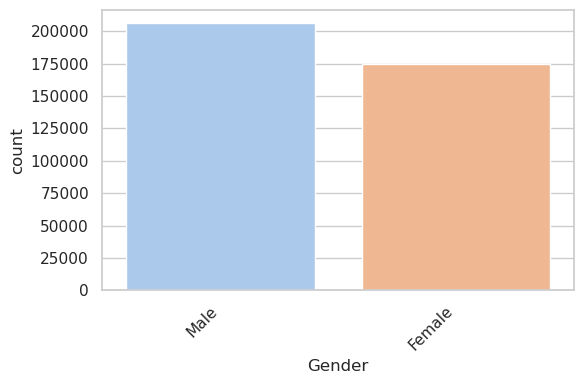

In [21]:
plot_cat("Gender")

In [23]:
#Calculando la proporción de Gender
df_cros.Gender.value_counts(normalize=True)

Gender
Male      0.540761
Female    0.459239
Name: proportion, dtype: float64

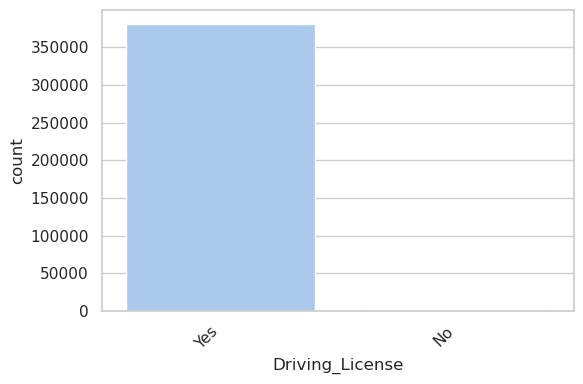

In [24]:
plot_cat("Driving_License")

In [25]:
#Calculando la proporción de Driving_License
df_cros.Driving_License.value_counts(normalize=True)

Driving_License
Yes    0.997869
No     0.002131
Name: proportion, dtype: float64

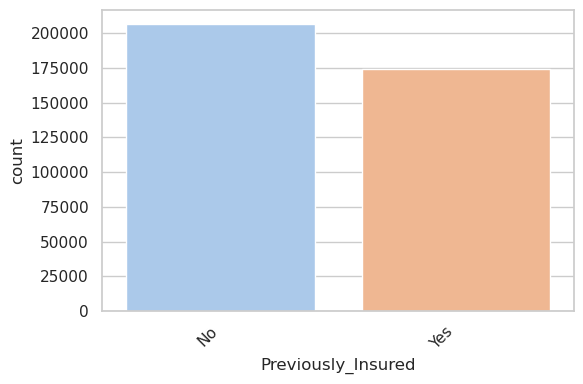

In [26]:
plot_cat("Previously_Insured")

In [28]:
#Calculando la proporción de Previously_Insured
df_cros.Previously_Insured.value_counts(normalize=True)

Previously_Insured
No     0.54179
Yes    0.45821
Name: proportion, dtype: float64

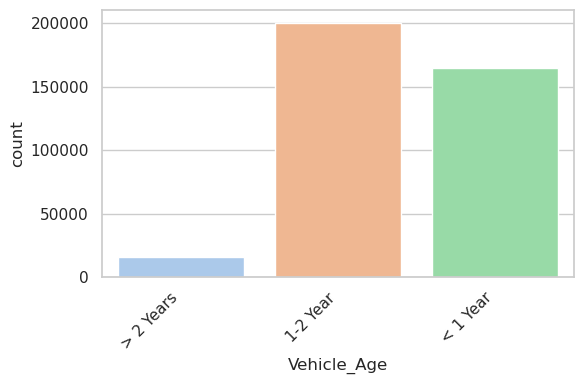

In [29]:
plot_cat("Vehicle_Age")

In [30]:
#Calculando la proporción de Vehicle_Age
df_cros.Vehicle_Age.value_counts(normalize=True)

Vehicle_Age
1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: proportion, dtype: float64

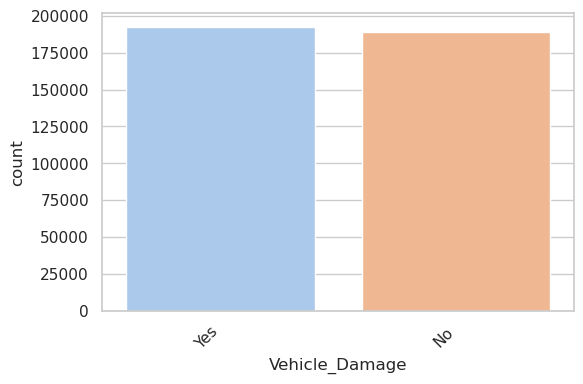

In [31]:
plot_cat("Vehicle_Damage")

In [32]:
#Calculando la proporción de Vehicle_Damage
df_cros.Vehicle_Damage.value_counts(normalize=True)

Vehicle_Damage
Yes    0.504877
No     0.495123
Name: proportion, dtype: float64

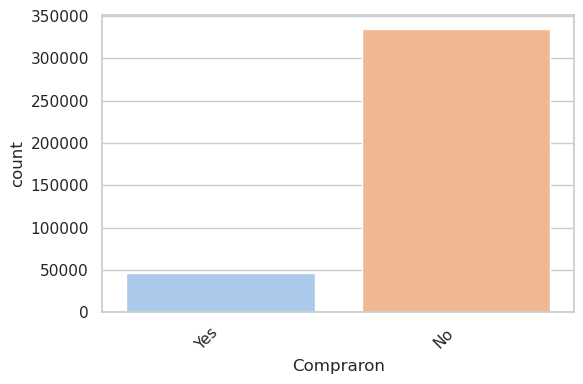

In [36]:
plot_cat("Compraron")

In [34]:
#Calculando la proporción de Compraron
df_cros.Compraron.value_counts(normalize=True)

Compraron
No     0.877437
Yes    0.122563
Name: proportion, dtype: float64

### Analisando variables numericas

In [38]:
## Para variables cuantitativas
def plot_num(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df_cros,x=feature,ax=axes[0])
    sns.distplot(a=df_cros[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

In [ ]:
Age
Region_Code
Annual_Premium
Policy_Sales_Channel
Vintage

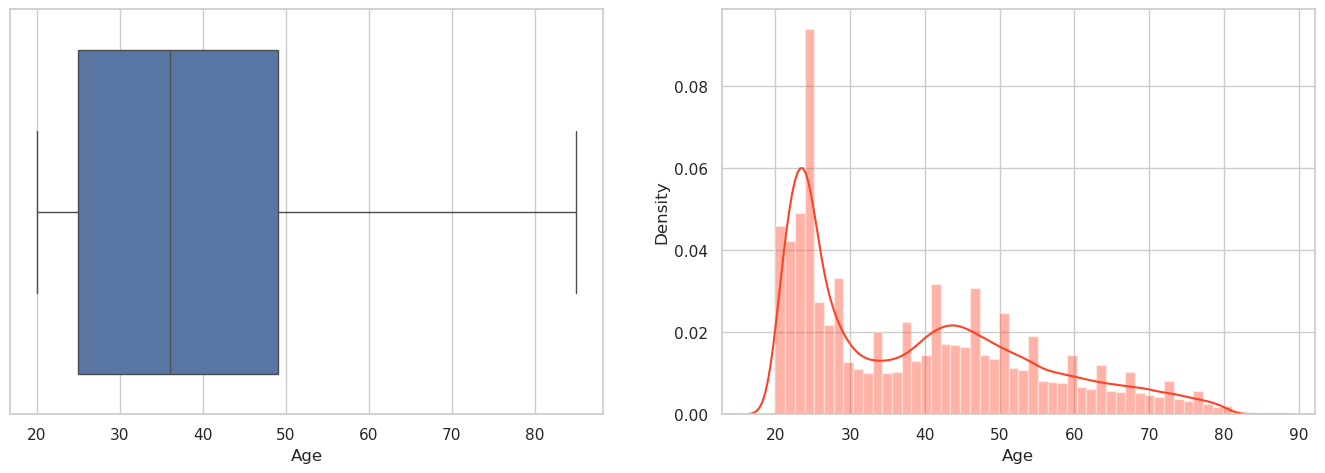

In [39]:
plot_num("Age")

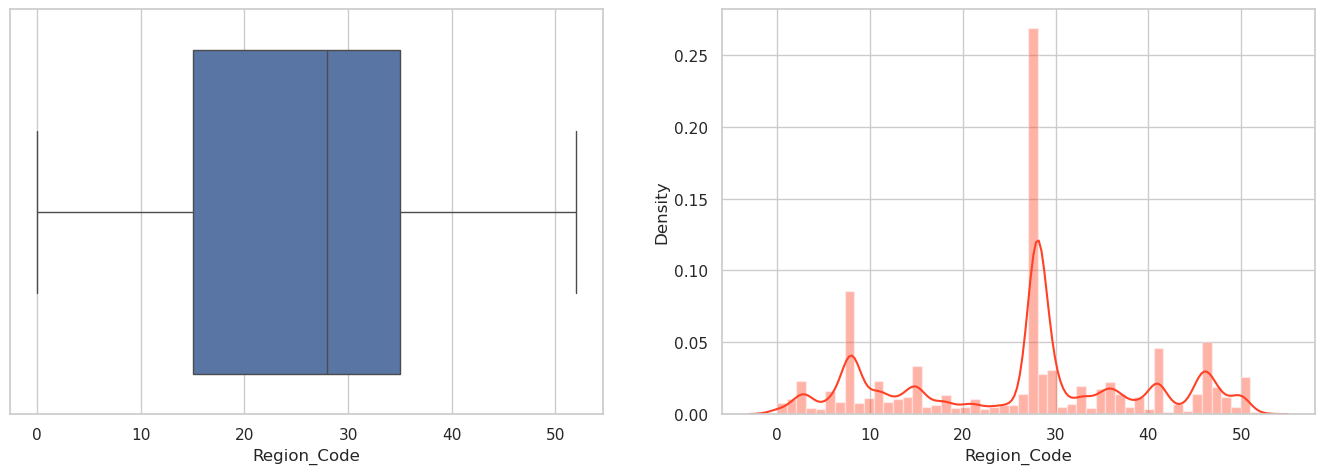

In [41]:
plot_num("Region_Code")

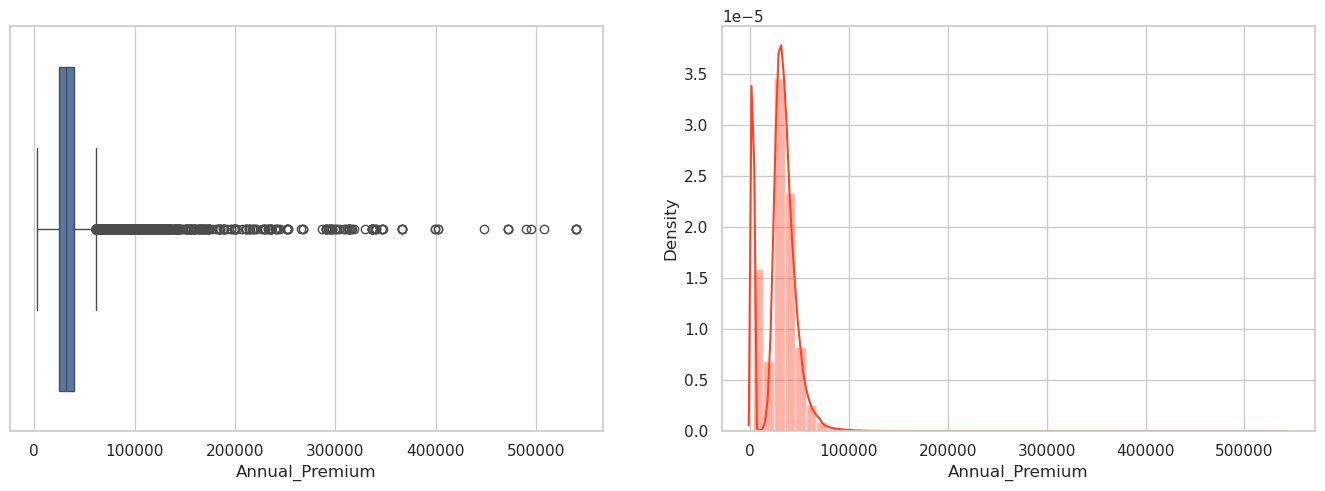

In [43]:
plot_num("Annual_Premium")

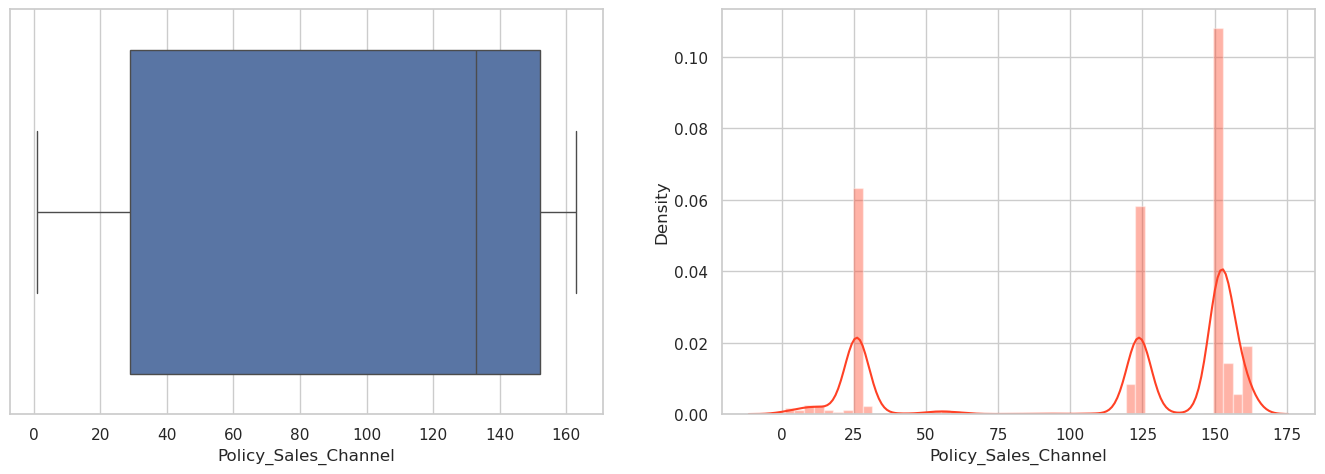

In [45]:
plot_num("Policy_Sales_Channel")

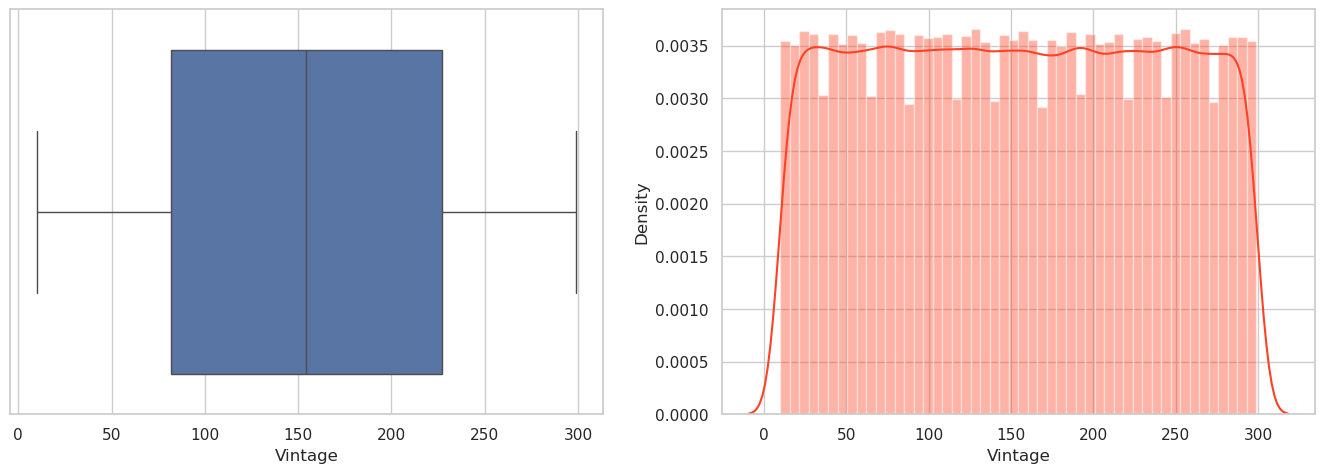

In [47]:
plot_num("Vintage")